# Figures for the paper

Plots for the new papere

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
from copy import copy
import scienceplots

In [2]:
#autoreloaa extensions
%load_ext autoreload
%autoreload 2

In [3]:
plt.rcParams.update({
    "font.size" : 20})
plt.style.use('science')

In [46]:
#import data
root_path = "../data"
evidence = pd.read_pickle(os.path.join(root_path, "evidence_aligned_trainv2660.pkl"))

In [47]:
#filter out test set
test_set_experiments = ["SRMATLAS", "MissingGene", "Proteotypic"]
evidence = evidence[~evidence.Experiment.isin(test_set_experiments)]

In [48]:
print(f"Before filtering: {evidence.shape[0]}")
#Filter out Reverse, Intensity > 0 and Charge 1
mask = (evidence["Reverse"] != "+") & (evidence["Charge"] > 1) & (evidence["Intensity"] > 0 & (~evidence["Aligned 1/K0"].isna()) )
evidence = evidence[mask]
print(f"After filtering: {evidence.shape[0]}")

Before filtering: 2626006
After filtering: 2626006


# Supplementary Figure 2

In [7]:
exp_to_organism = {
    "Pasef_tryp_fdr001" : "Homo Sapiens",
    "Yeast_lysc_fdr001" : "Yeast",
    "Yeast_tryp_fdr001" : "Yeast",
    "Yeast_lysn_fdr001" : "Yeast",
    "Drosophila_LysC_fdr001" : "Drosophila",
    "Drosophila_LysN_fdr001" : "Drosophila",
    "Drosophila_trp_fdr001" : "Drosophila",
    "Celegnas_trp_fdr001" : "C Elegans",
    "HeLa_trp_fdr001" : "Homo Sapiens",
    "hela_lysc_fdr001" : "Homo Sapiens",
    "HeLa_LysN_fdr001" : "Homo Sapiens",
    "Ecoli_tryp_fdr001" : "Ecoli",
    "Ecoli_lysc_fdr001" : "Ecoli",
    "Ecoli_lysn_fdr001" : "Ecoli"
}

evidence["Organism"] = evidence["Experiment"].map(exp_to_organism)

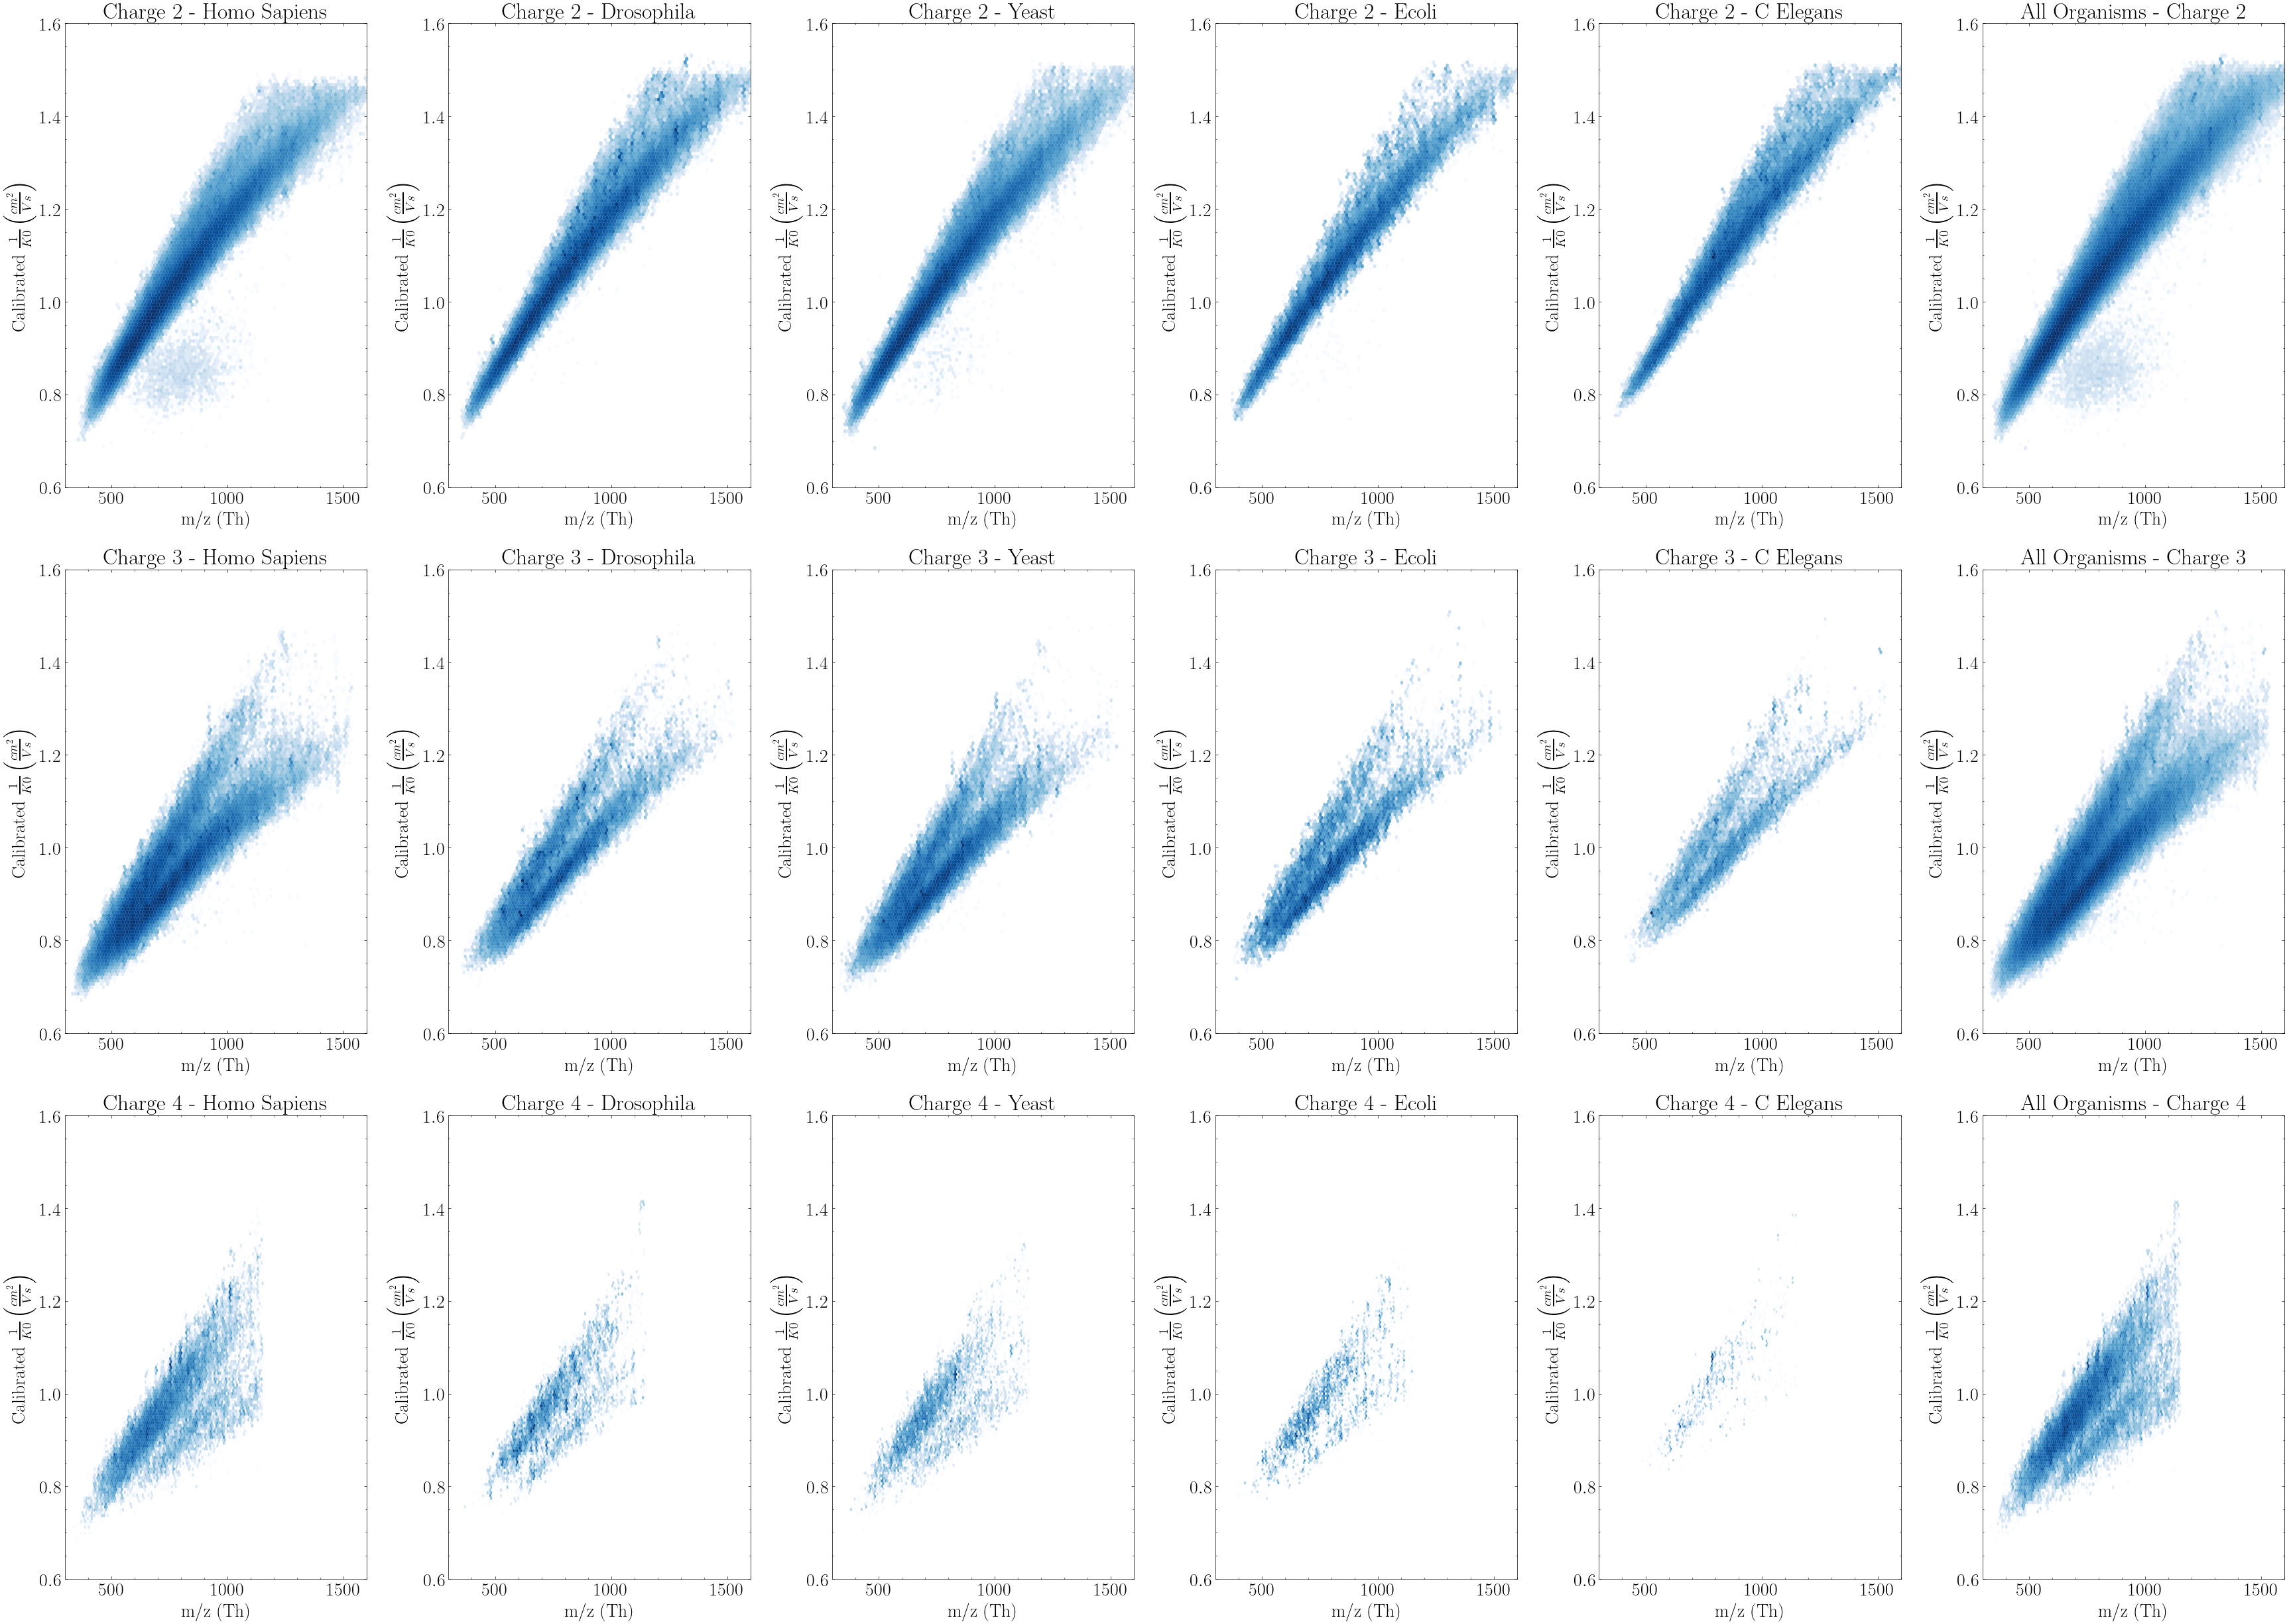

In [8]:
#plot 1/K0 vs m/z for each organism(rows) and charge state (columns)

fig, ax = plt.subplots(3, 6, figsize=(35, 25))

for i, charge in enumerate([2,3,4]):
    #  plot for each organism
    for j, organism in enumerate(evidence["Organism"].unique()):
        mask = evidence["Charge"] == charge
        mask &= evidence["Organism"] == organism
        evidence_charge = evidence[mask]
        ax[i,j].hexbin(evidence_charge["m/z"].values, evidence_charge["Aligned 1/K0"].values, gridsize = 100, cmap='Blues', linewidths=0.1, bins = "log")
        ax[i,j].set_xlabel("m/z (Th)")
        ax[i,j].set_ylabel(r"Calibrated $\frac{1}{K0} \left( \frac{cm^2}{Vs} \right)$ ")
        ax[i,j].set_title(f"Charge {charge} - {organism}")
        ax[i,j].set_xlim([300, 1600])
        ax[i,j].set_ylim([0.6, 1.6])

    # all organisms
    mask = evidence["Charge"] == charge
    evidence_charge = evidence[mask]
    ax[i,5].hexbin(evidence_charge["m/z"].values, evidence_charge["Aligned 1/K0"].values, gridsize = 100, cmap='Blues', linewidths=0.1, bins = "log")
    ax[i,5].set_xlabel("m/z (Th)")
    ax[i,5].set_ylabel(r"Calibrated $\frac{1}{K0} \left( \frac{cm^2}{Vs} \right)$ ")
    ax[i,5].set_title(f"All Organisms - Charge {charge}")
    ax[i,5].set_xlim([300, 1600])
    ax[i,5].set_ylim([0.6, 1.6])
        
plt.tight_layout()

# Supplementary Figure 3

Describe the bunny ears and the enzyme dependence

In [9]:
exp_to_organism = {
    "Pasef_tryp_fdr001" : "Trypsin",
    "Yeast_lysc_fdr001" : "LysC",
    "Yeast_tryp_fdr001" : "Trypsin",
    "Yeast_lysn_fdr001" : "LysN",
    "Drosophila_LysC_fdr001" : "LysC",
    "Drosophila_LysN_fdr001" : "LysN",
    "Drosophila_trp_fdr001" : "Trypsin",
    "Celegnas_trp_fdr001" : "Trypsin",
    "HeLa_trp_fdr001" : "Trypsin",
    "hela_lysc_fdr001" : "LysC",
    "HeLa_LysN_fdr001" : "LysN",
    "Ecoli_tryp_fdr001" : "Trypsin",
    "Ecoli_lysc_fdr001" : "LysC",
    "Ecoli_lysn_fdr001" : "LysN"
}

evidence["Enzyme"] = evidence["Experiment"].map(exp_to_organism)

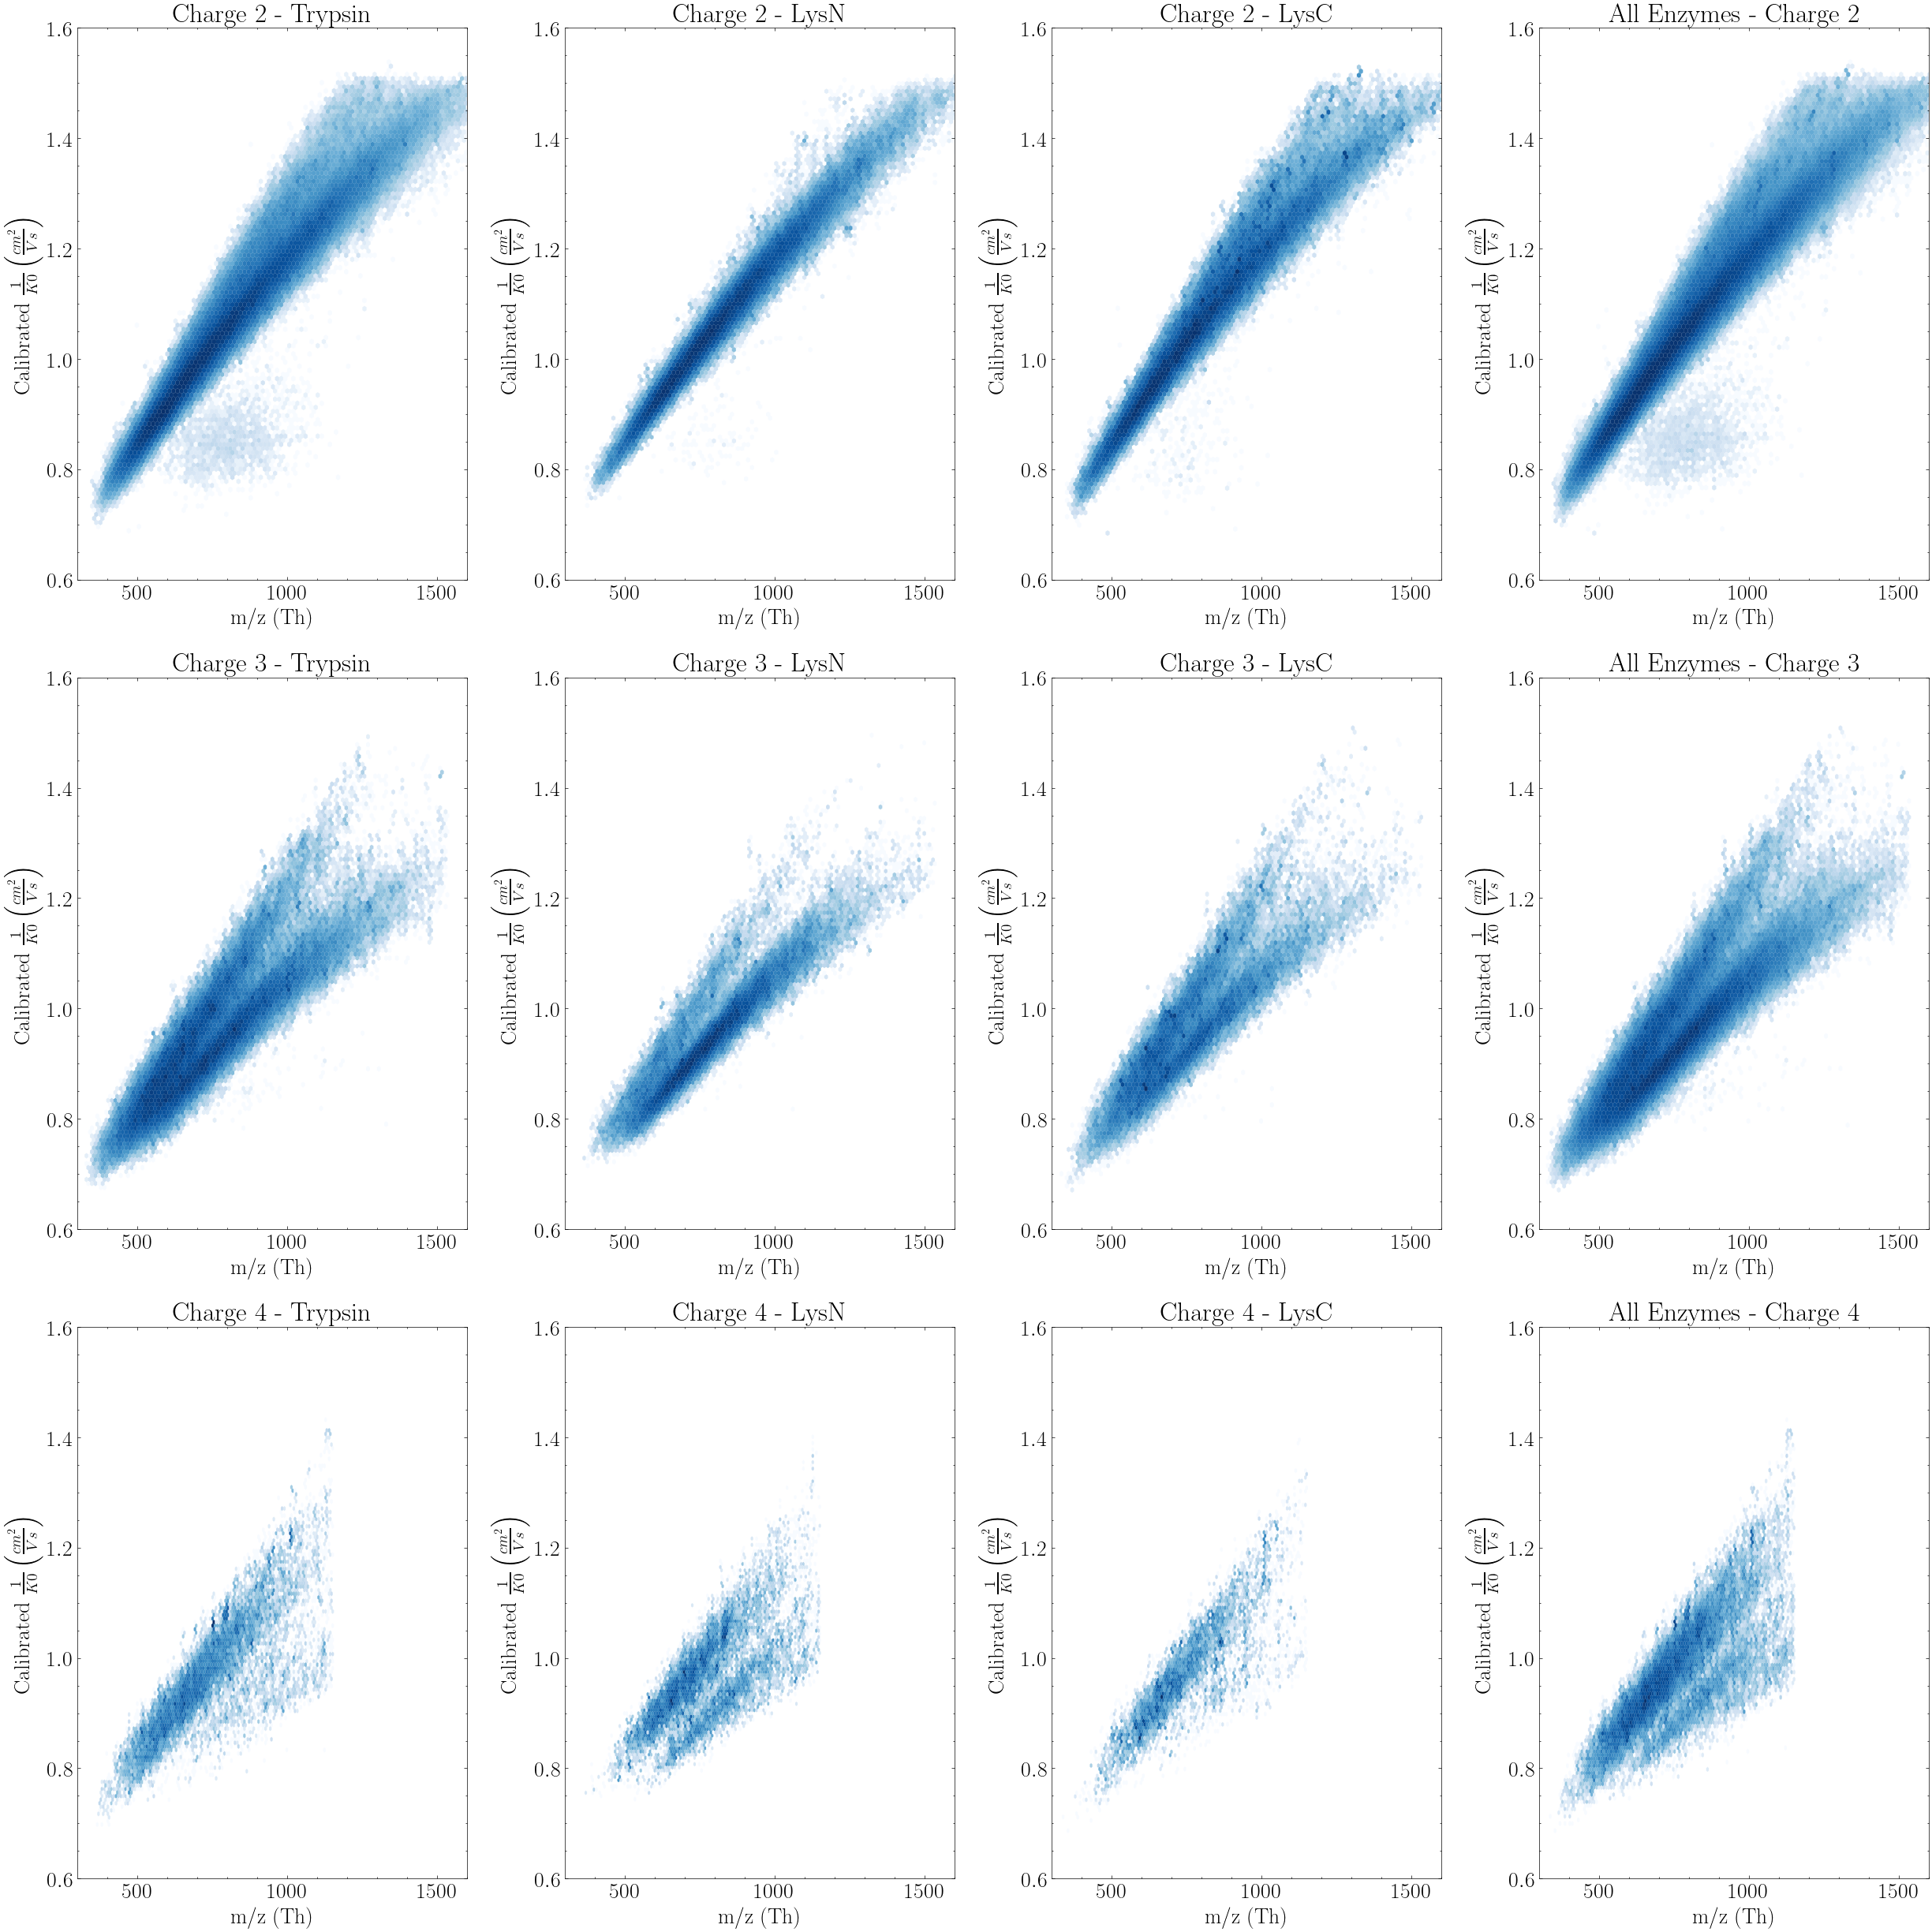

In [10]:
#plot Calibrated 1/K0 vs m/z for each charge
#to make it better see https://matplotlib.org/stable/gallery/image#jjjjelds/pcolormesh_levels.html
fig, ax = plt.subplots(3, 4, figsize=(25, 25))

for i, charge in enumerate([2, 3, 4]):
    #  plot for each enzyme
    for j, enzyme in enumerate(evidence["Enzyme"].unique()):
        mask = evidence["Charge"] == charge
        mask &= evidence["Enzyme"] == enzyme
        evidence_charge = evidence[mask]
        ax[i,j].hexbin(evidence_charge["m/z"].values, evidence_charge["Aligned 1/K0"].values, gridsize = 100, cmap='Blues', linewidths=0.1, bins = "log")
        ax[i,j].set_xlabel("m/z (Th)")
        ax[i,j].set_ylabel(r"Calibrated $\frac{1}{K0} \left( \frac{cm^2}{Vs} \right)$ ")
        ax[i,j].set_title(f"Charge {charge} - {enzyme}")
        ax[i,j].set_xlim([300, 1600])
        ax[i,j].set_ylim([0.6, 1.6])

    # all enzymes
    mask = evidence["Charge"] == charge
    evidence_charge = evidence[mask]
    ax[i,3].hexbin(evidence_charge["m/z"].values, evidence_charge["Aligned 1/K0"].values, gridsize = 100, cmap='Blues', linewidths=0.1, bins = "log")
    ax[i,3].set_xlabel("m/z (Th)")
    ax[i,3].set_ylabel(r"Calibrated $\frac{1}{K0} \left( \frac{cm^2}{Vs} \right)$ ")
    ax[i,3].set_title(f"All Enzymes - Charge {charge}")
    ax[i,3].set_xlim([300, 1600])
    ax[i,3].set_ylim([0.6, 1.6])
        
plt.tight_layout()
plt.show()

# Figure 1

## Supplementary Figure 1

In [11]:
exp_to_organism = {
    "Pasef_tryp_fdr001" : "Trypsin",
    "Yeast_lysc_fdr001" : "LysC",
    "Yeast_tryp_fdr001" : "Trypsin",
    "Yeast_lysn_fdr001" : "LysN",
    "Drosophila_LysC_fdr001" : "LysC",
    "Drosophila_LysN_fdr001" : "LysN",
    "Drosophila_trp_fdr001" : "Trypsin",
    "Celegnas_trp_fdr001" : "Trypsin",
    "HeLa_trp_fdr001" : "Trypsin",
    "hela_lysc_fdr001" : "LysC",
    "HeLa_LysN_fdr001" : "LysN",
    "Ecoli_tryp_fdr001" : "Trypsin",
    "Ecoli_lysc_fdr001" : "LysC",
    "Ecoli_lysn_fdr001" : "LysN"
}

evidence["Enzyme"] = evidence["Experiment"].map(exp_to_organism)

In [27]:
# Define the list of enzymes
enzymes = ["Trypsin", "LysC", "LysN"]

gmm_models = {}
pdfs = {}
initial_means = {
    2:{
    "Trypsin": np.array([[2.0, 3.0], [1.0, 0.0]]),
    "LysC" : np.array([[1.0, 3.0], [0.5, 0.0]]), 
    "LysN": np.array([[-1.0, 0.0], [-1.0, 0.0]])
    },
    3: {
    "Trypsin": np.array([[-0.5, 0], [0.5, 0.0]]),
    "LysC": np.array([[-0.5, 0], [0.5, 0.0]]),
    "LysN": np.array([[-1.0, 0.0], [0.5, 0.5]])
    },
    4: {
    "Trypsin": np.array([[-1.0, -1.0], [1.5, -1.0]]),
    "LysC": np.array([[0.0, .0], [2.0, -1.0]]),
    "LysN": np.array([[0.0,0.0], [1.0, -1.0]])
    }
}
evidence["cluster"] = -1

/fs/home/rlopez/ccs_paper/CCS/.env/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/fs/home/rlopez/ccs_paper/CCS/.env/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/fs/home/rlopez/ccs_paper/CCS/.env/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying 

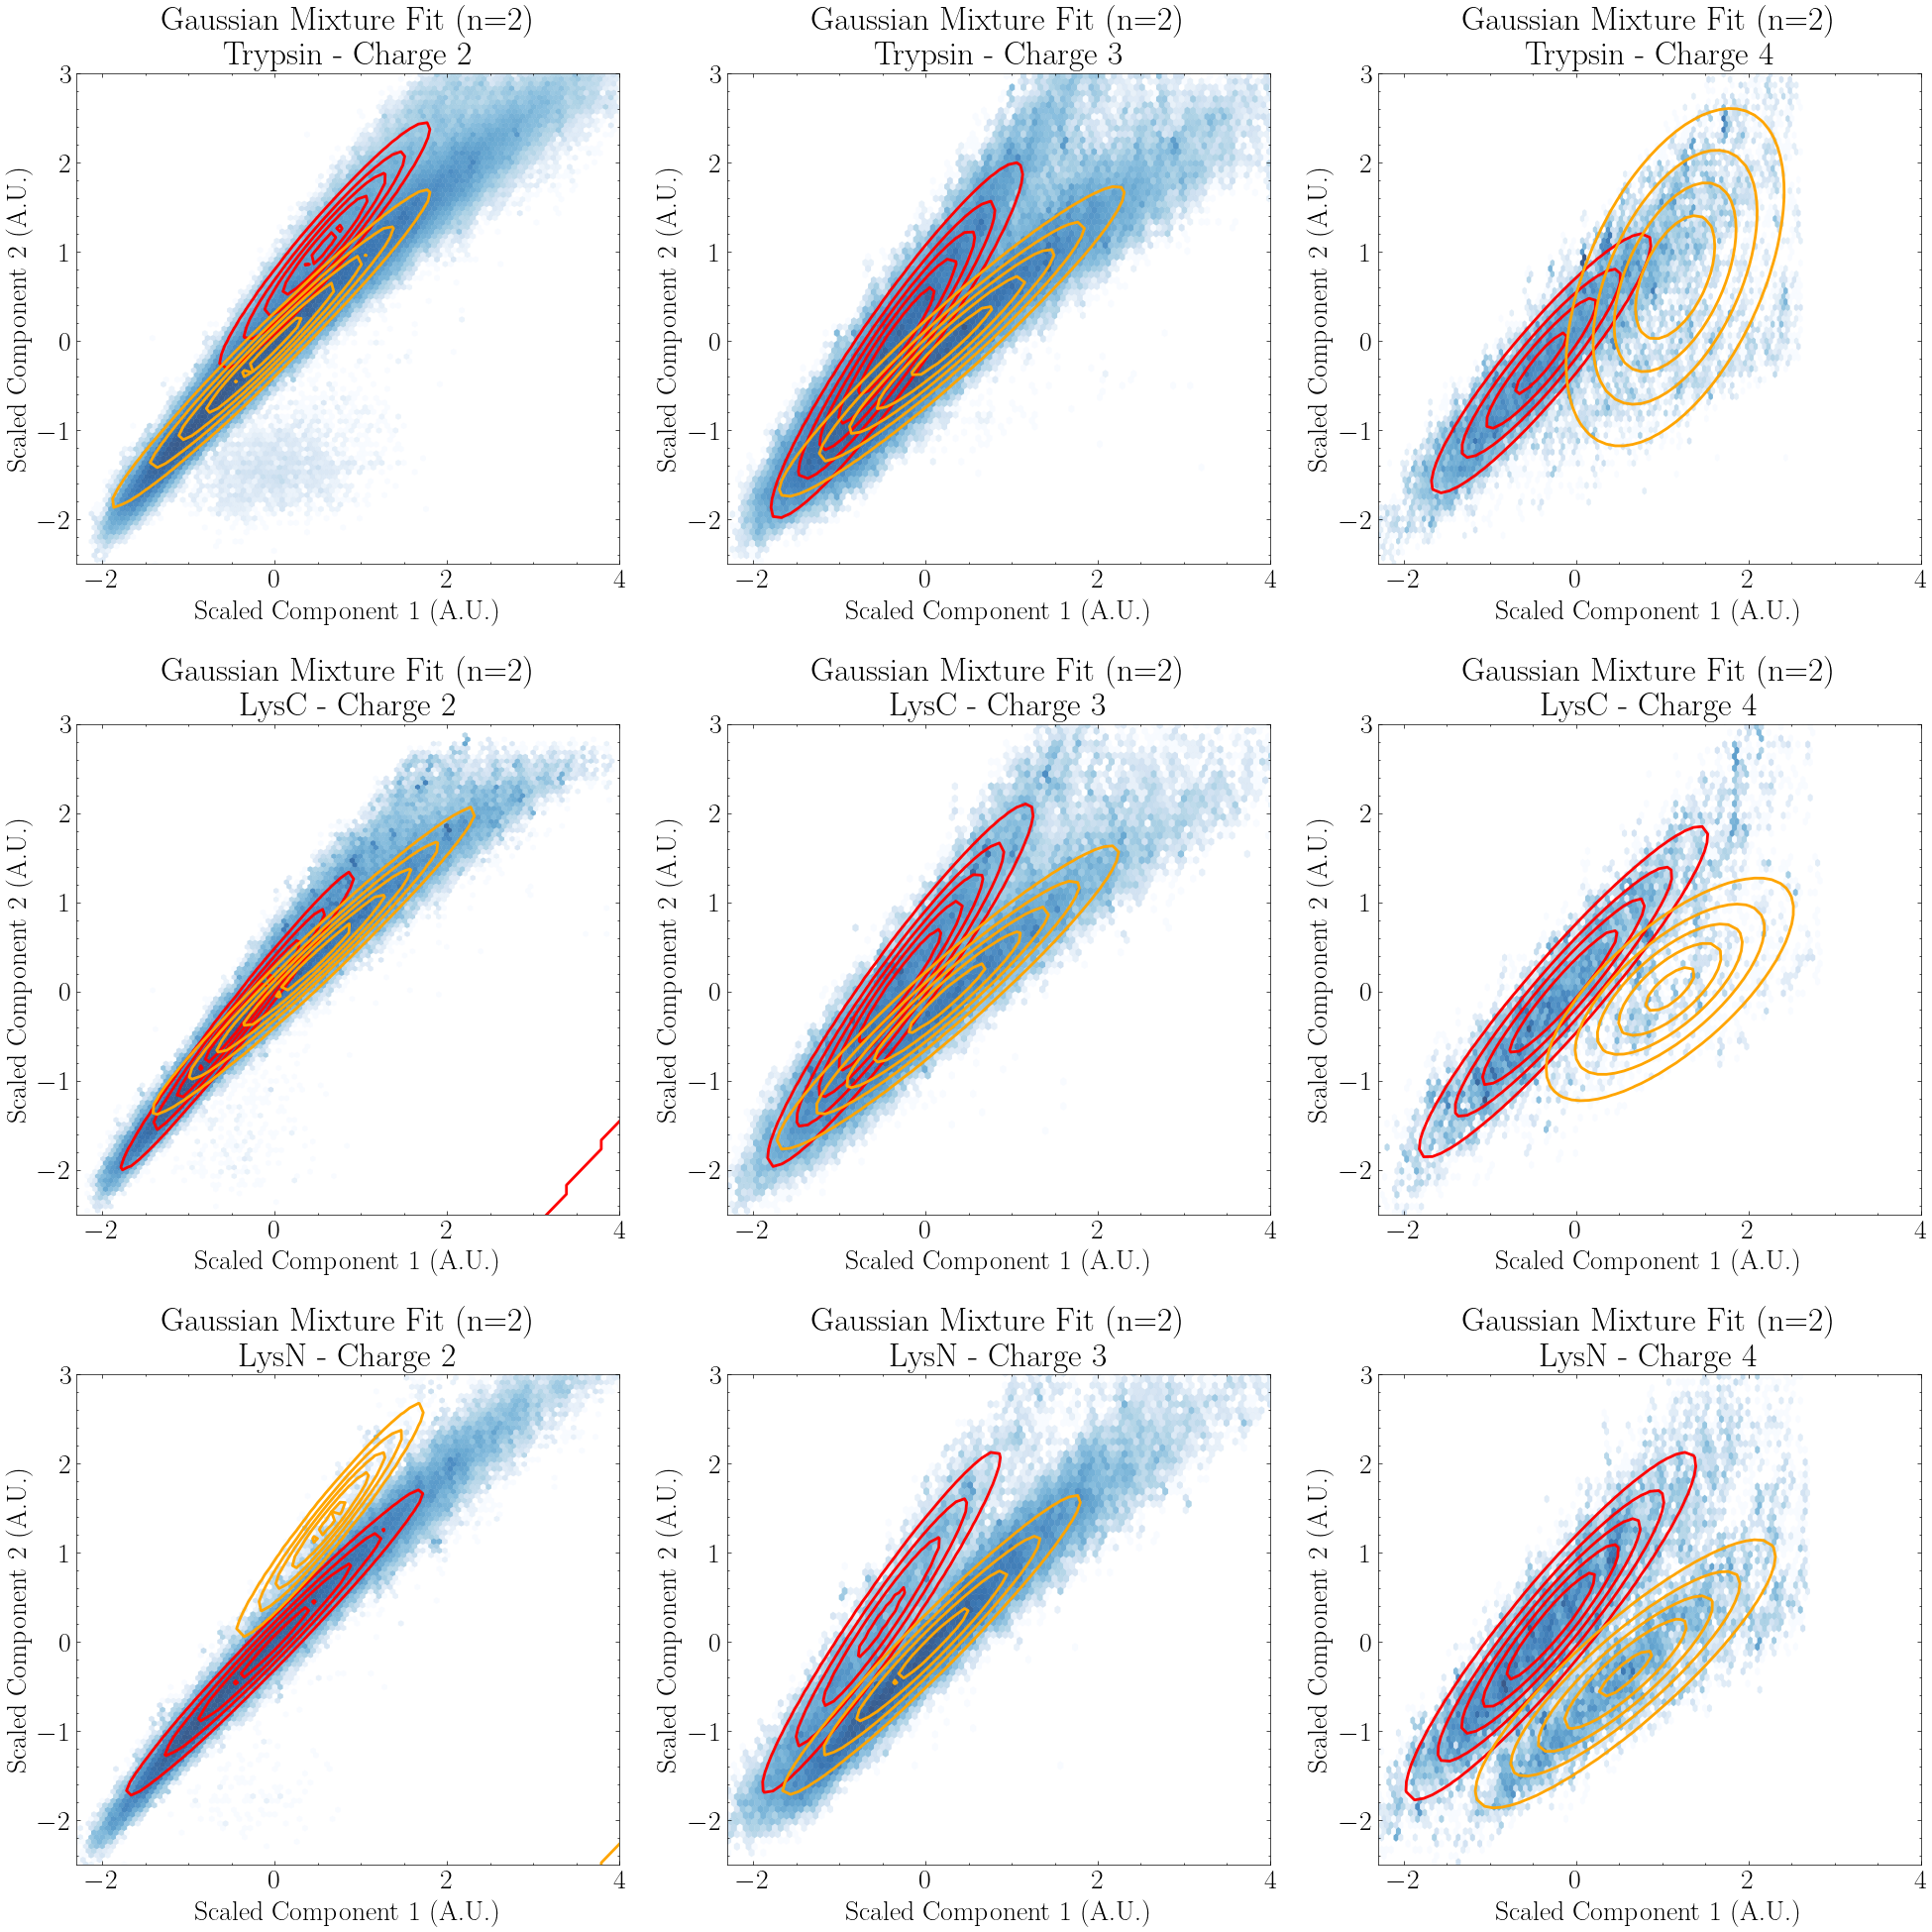

In [28]:
 
# Create a figure with 3 rows (one for each enzyme) and 3 columns (one for each charge)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

for j, charge in enumerate([2, 3, 4]):
    gmm_models[charge] = {} # Initialize dictionary for charge
    for i, enzyme in enumerate(enzymes):
        # Filter data for the current enzyme and charge
        mask = (evidence["Charge"] == charge) & (evidence["Enzyme"] == enzyme)
        evidence_charge = evidence.loc[mask]

        # Scale data to have mean 0 and variance 1 for gaussian mixture
        X = evidence_charge[["m/z", "Aligned 1/K0"]]
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0, means_init=initial_means[charge][enzyme],)
        gmm.fit(X_scaled)
        #predict the cluster
        labels = gmm.predict(X_scaled)
        evidence_charge.loc[:,"cluster"] = labels
        evidence.loc[mask, "cluster"] = labels
        gmm_models[charge][enzyme] = gmm

        axes[i,j].hexbin(X_scaled[:, 0], X_scaled[:, 1], gridsize = 100, cmap='Blues', linewidths=0.1, bins = "log", alpha=0.8)

        x = np.linspace(-5, 5, 100)
        y = np.linspace(-5, 5, 100)
        X, Y = np.meshgrid(x, y)
        pos = np.empty(X.shape + (2,))
        pos[:, :, 0] = X
        pos[:, :, 1] = Y

        color_list = ["red", "orange"]
        for k in range(2):
            rv = multivariate_normal(gmm.means_[k], gmm.covariances_[k])
            contour = axes[i,j].contour(X, Y, rv.pdf(pos), levels=5, colors=color_list[k], linewidths=2)
            # Create a proxy artist for the contour plot
        axes[i,j].set_title(f"Gaussian Mixture Fit (n=2) \n {enzyme} - Charge {charge}")
        axes[i,j].set_xlim(-2.3,4)
        axes[i,j].set_ylim(-2.5,3)
        axes[i,j].set_xlabel("Scaled Component 1 (A.U.)")
        axes[i,j].set_ylabel("Scaled Component 2 (A.U.)")

plt.tight_layout()

## Both conformations

the cluster column has information about in which population they're predicted to be

In [29]:
#calculate numerically the volume of a gaussian
def volume_gaussian_2d(gmm, cluster):
    #calculate the volume of the gaussian
    cov = gmm.covariances_[cluster]
    det = np.linalg.det(cov)
    weight = gmm.weights_[cluster]
    volume = 2*np.pi*np.sqrt(det)*weight
    return volume

#test the volume of the gaussian
#should be 2*pi when covariance is identity
gmm_test = copy(gmm)
gmm_test.covariances_ = [np.array([[1,0], [0,1]])]
gmm_test.weights_ = [1]
vol_test = volume_gaussian_2d(gmm_test, 0)
assert np.isclose(vol_test, 2*np.pi, atol=1e-3)

In [30]:
#create a table with the charges in the columns and the enzymes in the rows
# and the percentage of volume of the bottom gaussian in each cluster
volumes = pd.DataFrame()

for charge in [2, 3, 4]:
    for i, enzyme in enumerate(enzymes):
        gmm = gmm_models[charge][enzyme]
        vol_0 = volume_gaussian_2d(gmm, 0)
        vol_1 = volume_gaussian_2d(gmm, 1)
        volumes.loc[enzyme, charge] = vol_1/ (vol_0 + vol_1)

volumes

2         3         4
Trypsin  0.945587  0.537490  0.483466
LysC     0.573962  0.547648  0.135044
LysN     0.003087  0.869366  0.364078

In [31]:
#Is the volume a good proxy for the number of points?

#create a table with the charges in the columns and the enzymes in the rows
# and the normalized value counts of the clusters
counts = pd.DataFrame()
for charge in [2, 3, 4]:
    for i, enzyme in enumerate(enzymes):
        mask = (evidence["Charge"] == charge) & (evidence["Enzyme"] == enzyme)
        evidence_charge = evidence[mask]
        counts.loc[enzyme, charge] = evidence_charge["cluster"].value_counts(normalize=True).loc[1]
counts

2         3         4
Trypsin  0.942932  0.496597  0.234826
LysC     0.381332  0.513558  0.106277
LysN     0.004407  0.885449  0.329235

In [32]:
#sort evidence by Modified sequence, charge and K0 and get the groups of size 2 whose elements are in more than one cluster
peptides_in_both = evidence.sort_values(["Modified sequence", "Charge", "Aligned 1/K0"], ascending=False)
#peptides_in_both = evidence.groupby(["Modified sequence", "Charge"]).filter(lambda x: x.shape[0] > 1)
peptides_in_both = peptides_in_both.groupby(["Modified sequence", "Charge"]).filter(lambda x: x["cluster"].nunique() > 1)
#get the top measure
top = peptides_in_both.groupby(["Modified sequence", "Charge"]).first()
#get the bottom measure
bottom = peptides_in_both.groupby(["Modified sequence", "Charge"]).last()
#concatenate the top and bottom measures
peptides_both = pd.concat([top, bottom], axis=0)
#sort it by Modified sequence and charge 
peptides_both = peptides_both.sort_values(["Modified sequence", "Charge"]).reset_index()

In [33]:
top.shape, bottom.shape, 

((49741, 11), (49741, 11))

Enzyme Trypsin - Charge 2 - 46526/264234
Enzyme Trypsin - Charge 3 - 12884/83215
Enzyme Trypsin - Charge 4 - 700/11019
Enzyme LysC - Charge 2 - 29343/63581
Enzyme LysC - Charge 3 - 4349/25079
Enzyme LysC - Charge 4 - 387/4673
Enzyme LysN - Charge 2 - 593/75049
Enzyme LysN - Charge 3 - 3315/36393
Enzyme LysN - Charge 4 - 1385/9953


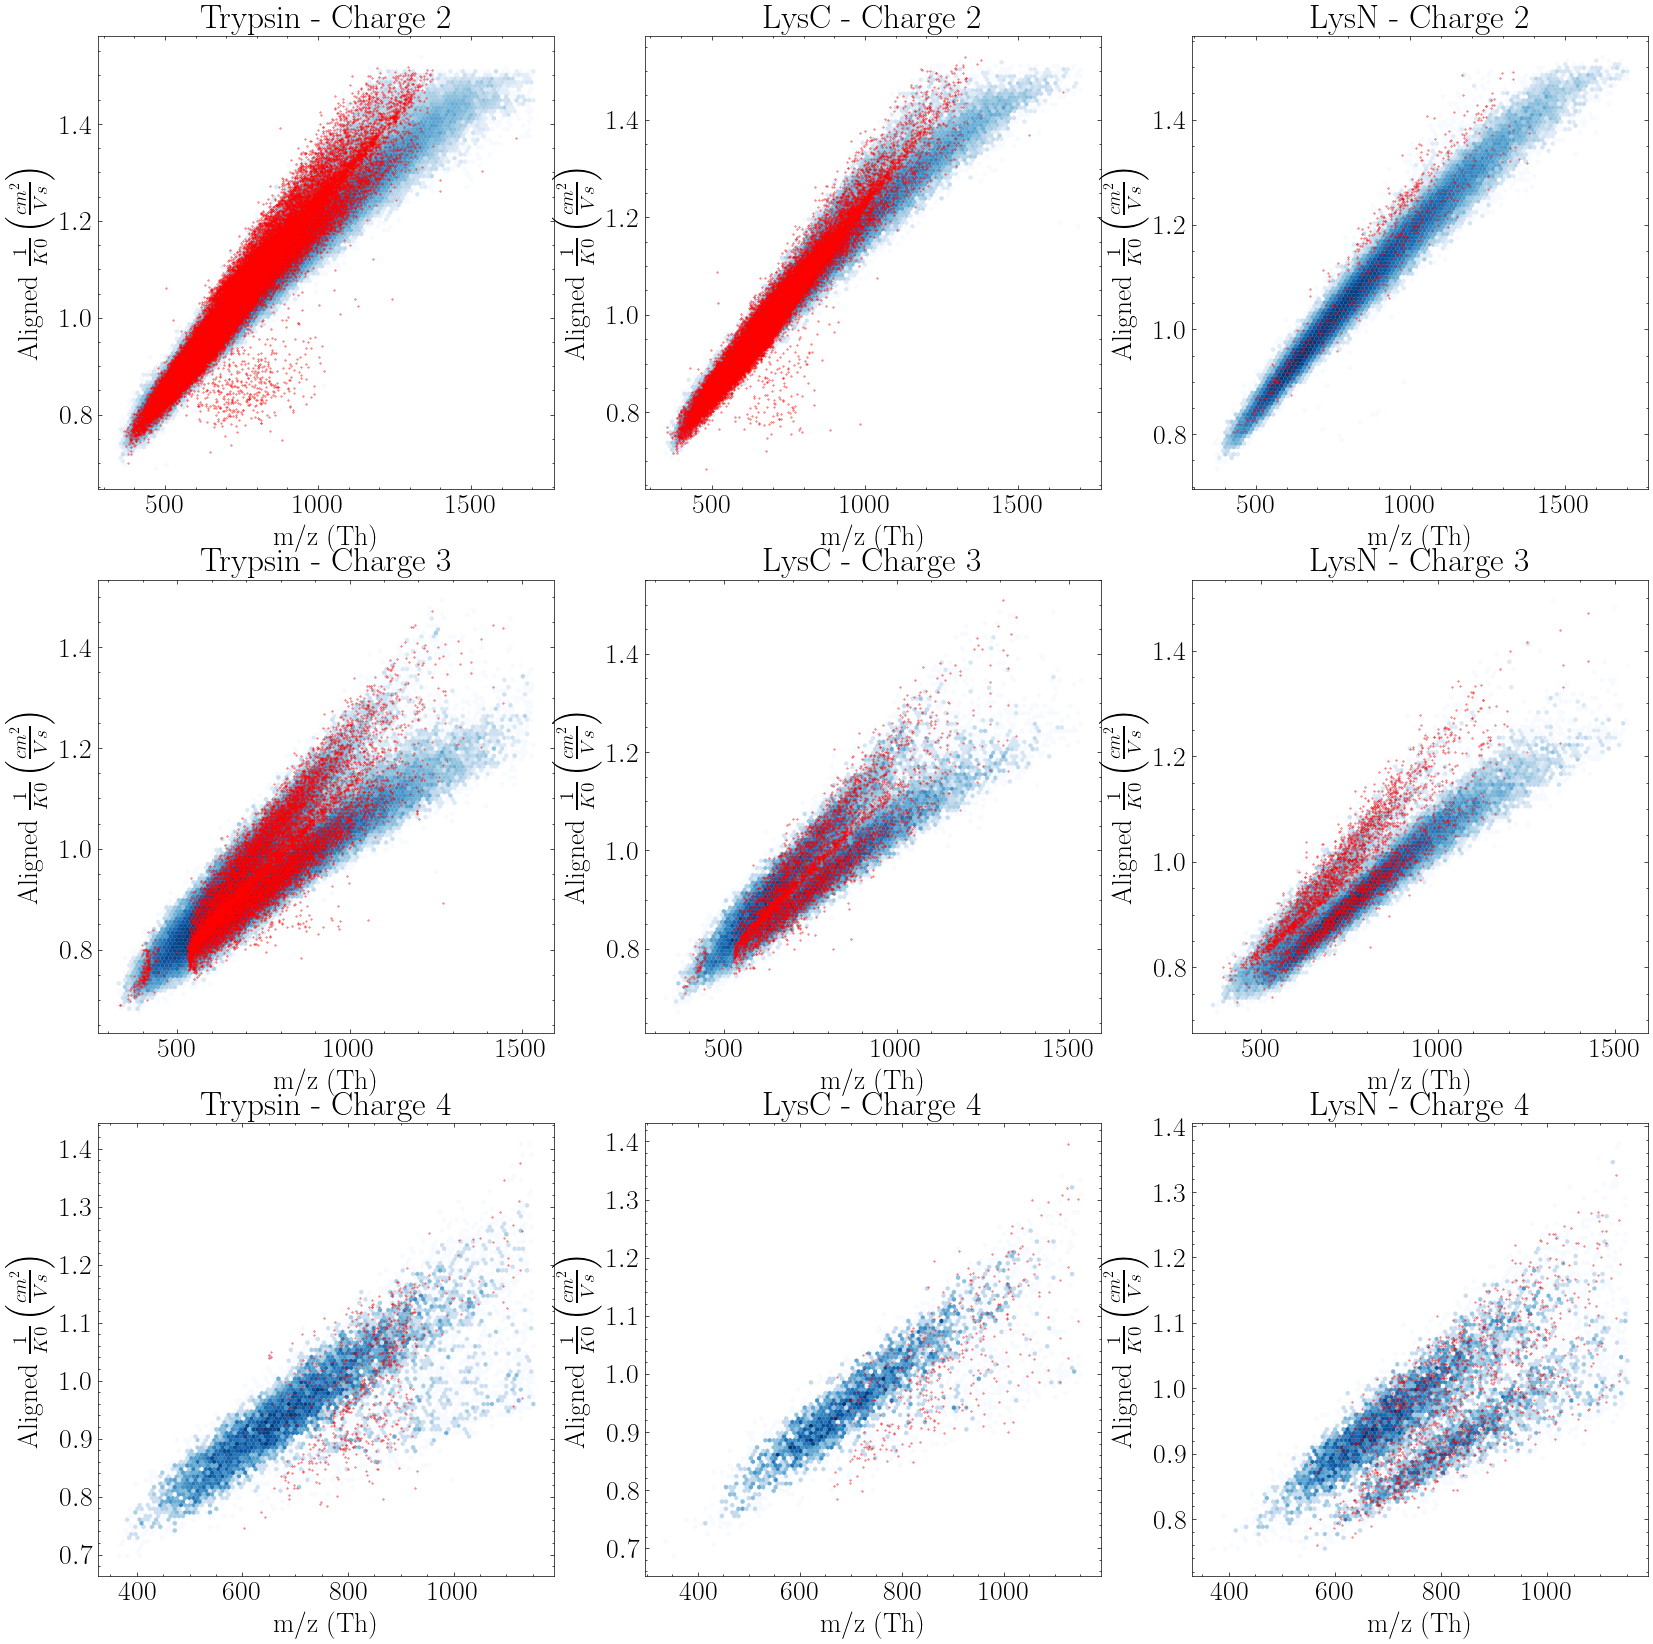

In [34]:
#plot trypitci, ch3 peptides and in red those in both clusters
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
in_both = pd.DataFrame()
precursors = evidence.groupby(["Modified sequence", "Charge"]).first().reset_index()

for i, enzyme in enumerate(enzymes):
    mask = precursors["Enzyme"] == enzyme
    precursors_enzyme = precursors[mask]
    mask = peptides_both["Enzyme"] == enzyme
    peptides_in_both_enzyme = peptides_both[mask]
    for j, charge in enumerate([2, 3, 4]):
        mask = precursors_enzyme["Charge"] == charge
        precursors_charge = precursors_enzyme[mask]
        mask = peptides_in_both_enzyme["Charge"] == charge
        peptides_in_both_charge = peptides_in_both_enzyme[mask]
        in_both.loc[enzyme, charge] = f"{peptides_in_both_charge.shape[0]}/{precursors_charge.shape[0]}"
        print(f"Enzyme {enzyme} - Charge {charge} - {in_both.loc[enzyme, charge]}")
        ax[j,i].hexbin(precursors_charge["m/z"], precursors_charge["Aligned 1/K0"], gridsize = 100, cmap='Blues', linewidths=0.1, bins = "log",)
        ax[j,i].scatter(peptides_in_both_charge["m/z"], peptides_in_both_charge["Aligned 1/K0"], c="red", s=0.1, alpha=1.0)
        ax[j,i].set_title(f"{enzyme} - Charge {charge}")
        ax[j,i].set_xlabel("m/z (Th)")
        ax[j,i].set_ylabel(r"Aligned $\frac{1}{K0} \left( \frac{cm^2}{Vs} \right)$ ")

## Complete Figure

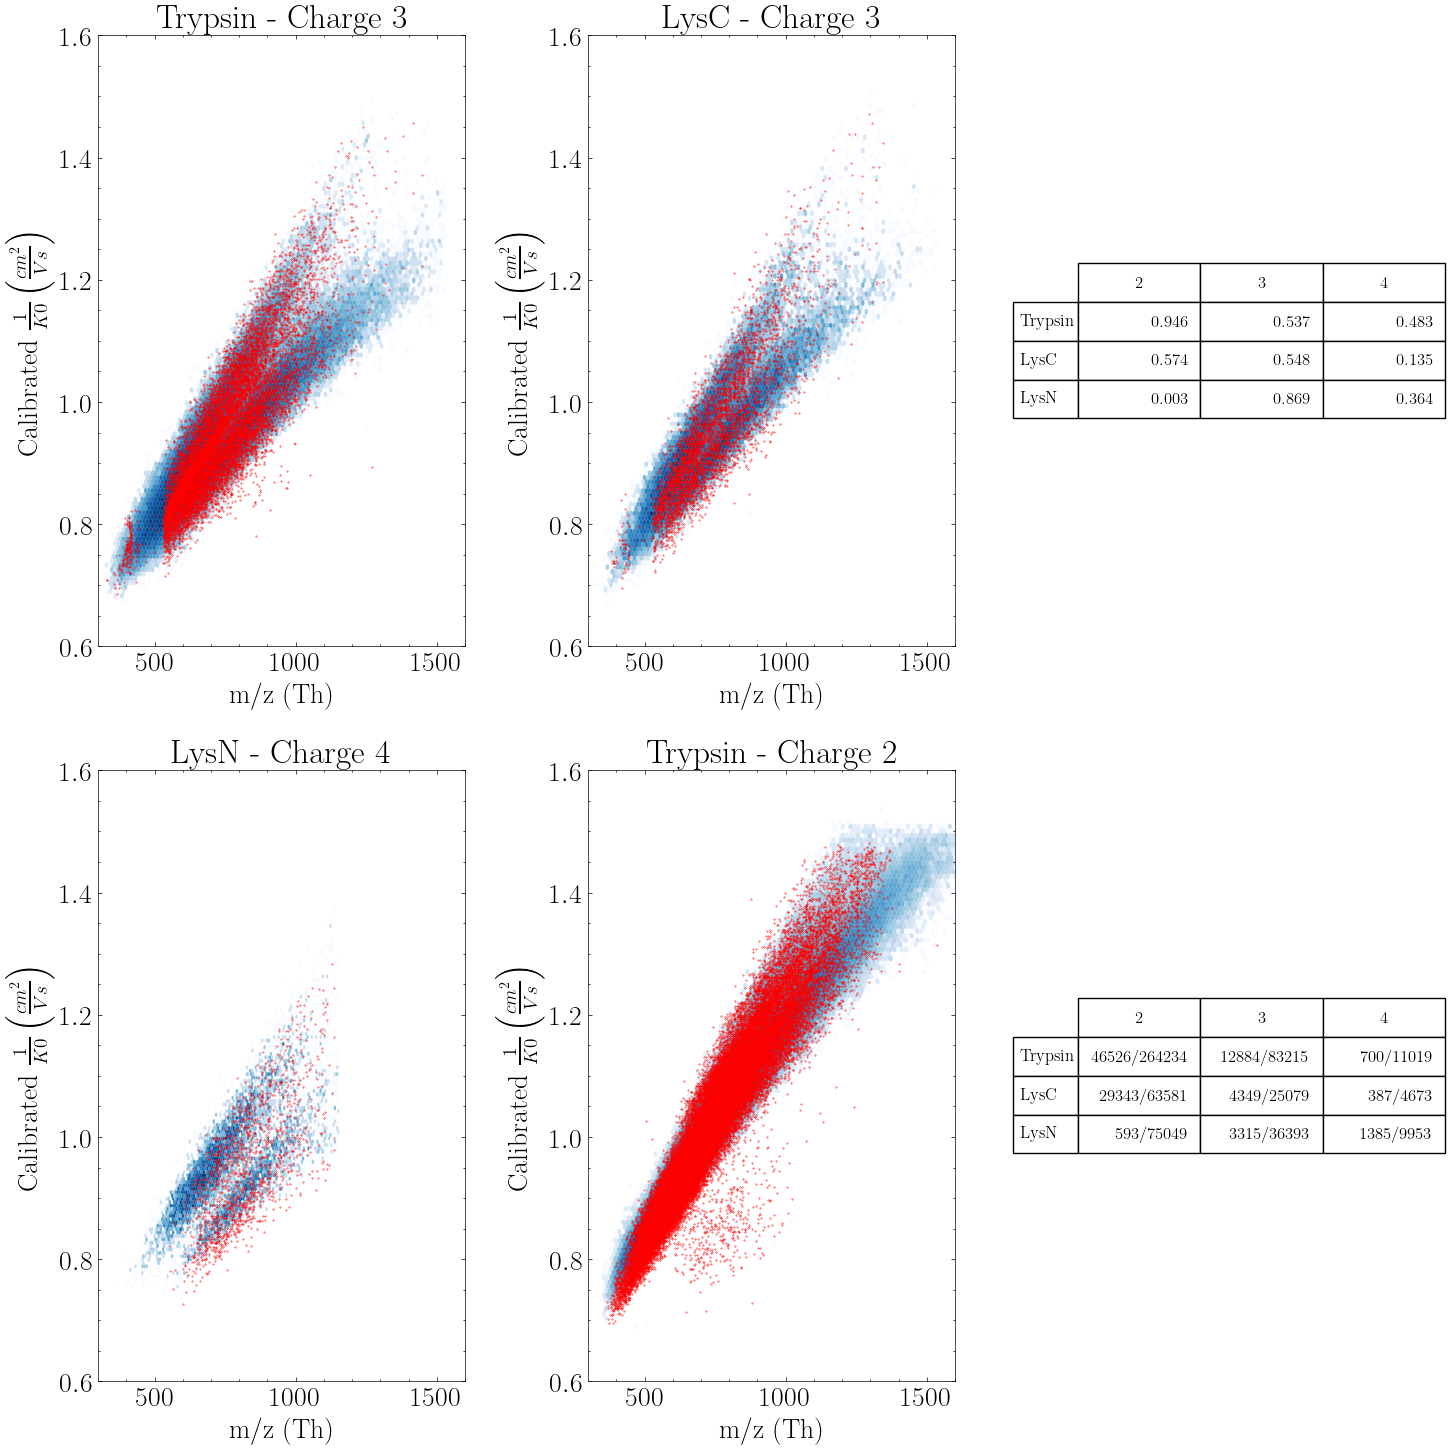

In [35]:
#plot Calibrated 1/K0 vs m/z for trypsin charge 3, lysc with charge 3, lysn with charge 4, trypsin with charge 2
fig, ax = plt.subplots(2, 3, figsize=(15, 15))
precursors = evidence.groupby(["Modified sequence", "Charge"]).first().reset_index()

for i, (enzyme, charge) in enumerate([("Trypsin", 3), ("LysC", 3), ("LysN", 4), ("Trypsin", 2)]):
    mask = precursors["Charge"] == charge
    mask &= precursors["Enzyme"] == enzyme
    precursors_charge = precursors[mask]
    #add the peptides in both clusters
    mask = peptides_both["Charge"] == charge
    mask &= peptides_both["Enzyme"] == enzyme
    peptides_in_both_charge = peptides_both[mask]
    
    ax[i//2, i%2].hexbin(precursors_charge["m/z"], precursors_charge["Aligned 1/K0"], gridsize = 100, cmap='Blues', linewidths=0.1, bins = "log",)
    ax[i//2, i%2].scatter(peptides_in_both_charge["m/z"], peptides_in_both_charge["Calibrated 1/K0"], c="red", s=0.1, alpha=1.0)
    ax[i//2, i%2].set_xlabel(r"m/z (Th)")
    ax[i//2, i%2].set_ylabel(r"Calibrated $\frac{1}{K0} \left( \frac{cm^2}{Vs} \right)$")
    ax[i//2, i%2].set_title(f"{enzyme} - Charge {charge}")
    ax[i//2, i%2].set_xlim([300, 1600])
    ax[i//2, i%2].set_ylim([0.6, 1.6])

#add the table with the peptides in both clusters
ax[1,2].axis("off")
table = ax[1,2].table(cellText=in_both.values, rowLabels=in_both.index, colLabels=in_both.columns, loc="center")
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.0, 2.0)

#add the table with the volumes as percentages
ax[0,2].axis("off")
table = ax[0,2].table(cellText=np.round(volumes.values, 3), rowLabels=volumes.index, colLabels=volumes.columns, loc="center")
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.0, 2.0)
plt.tight_layout()
    

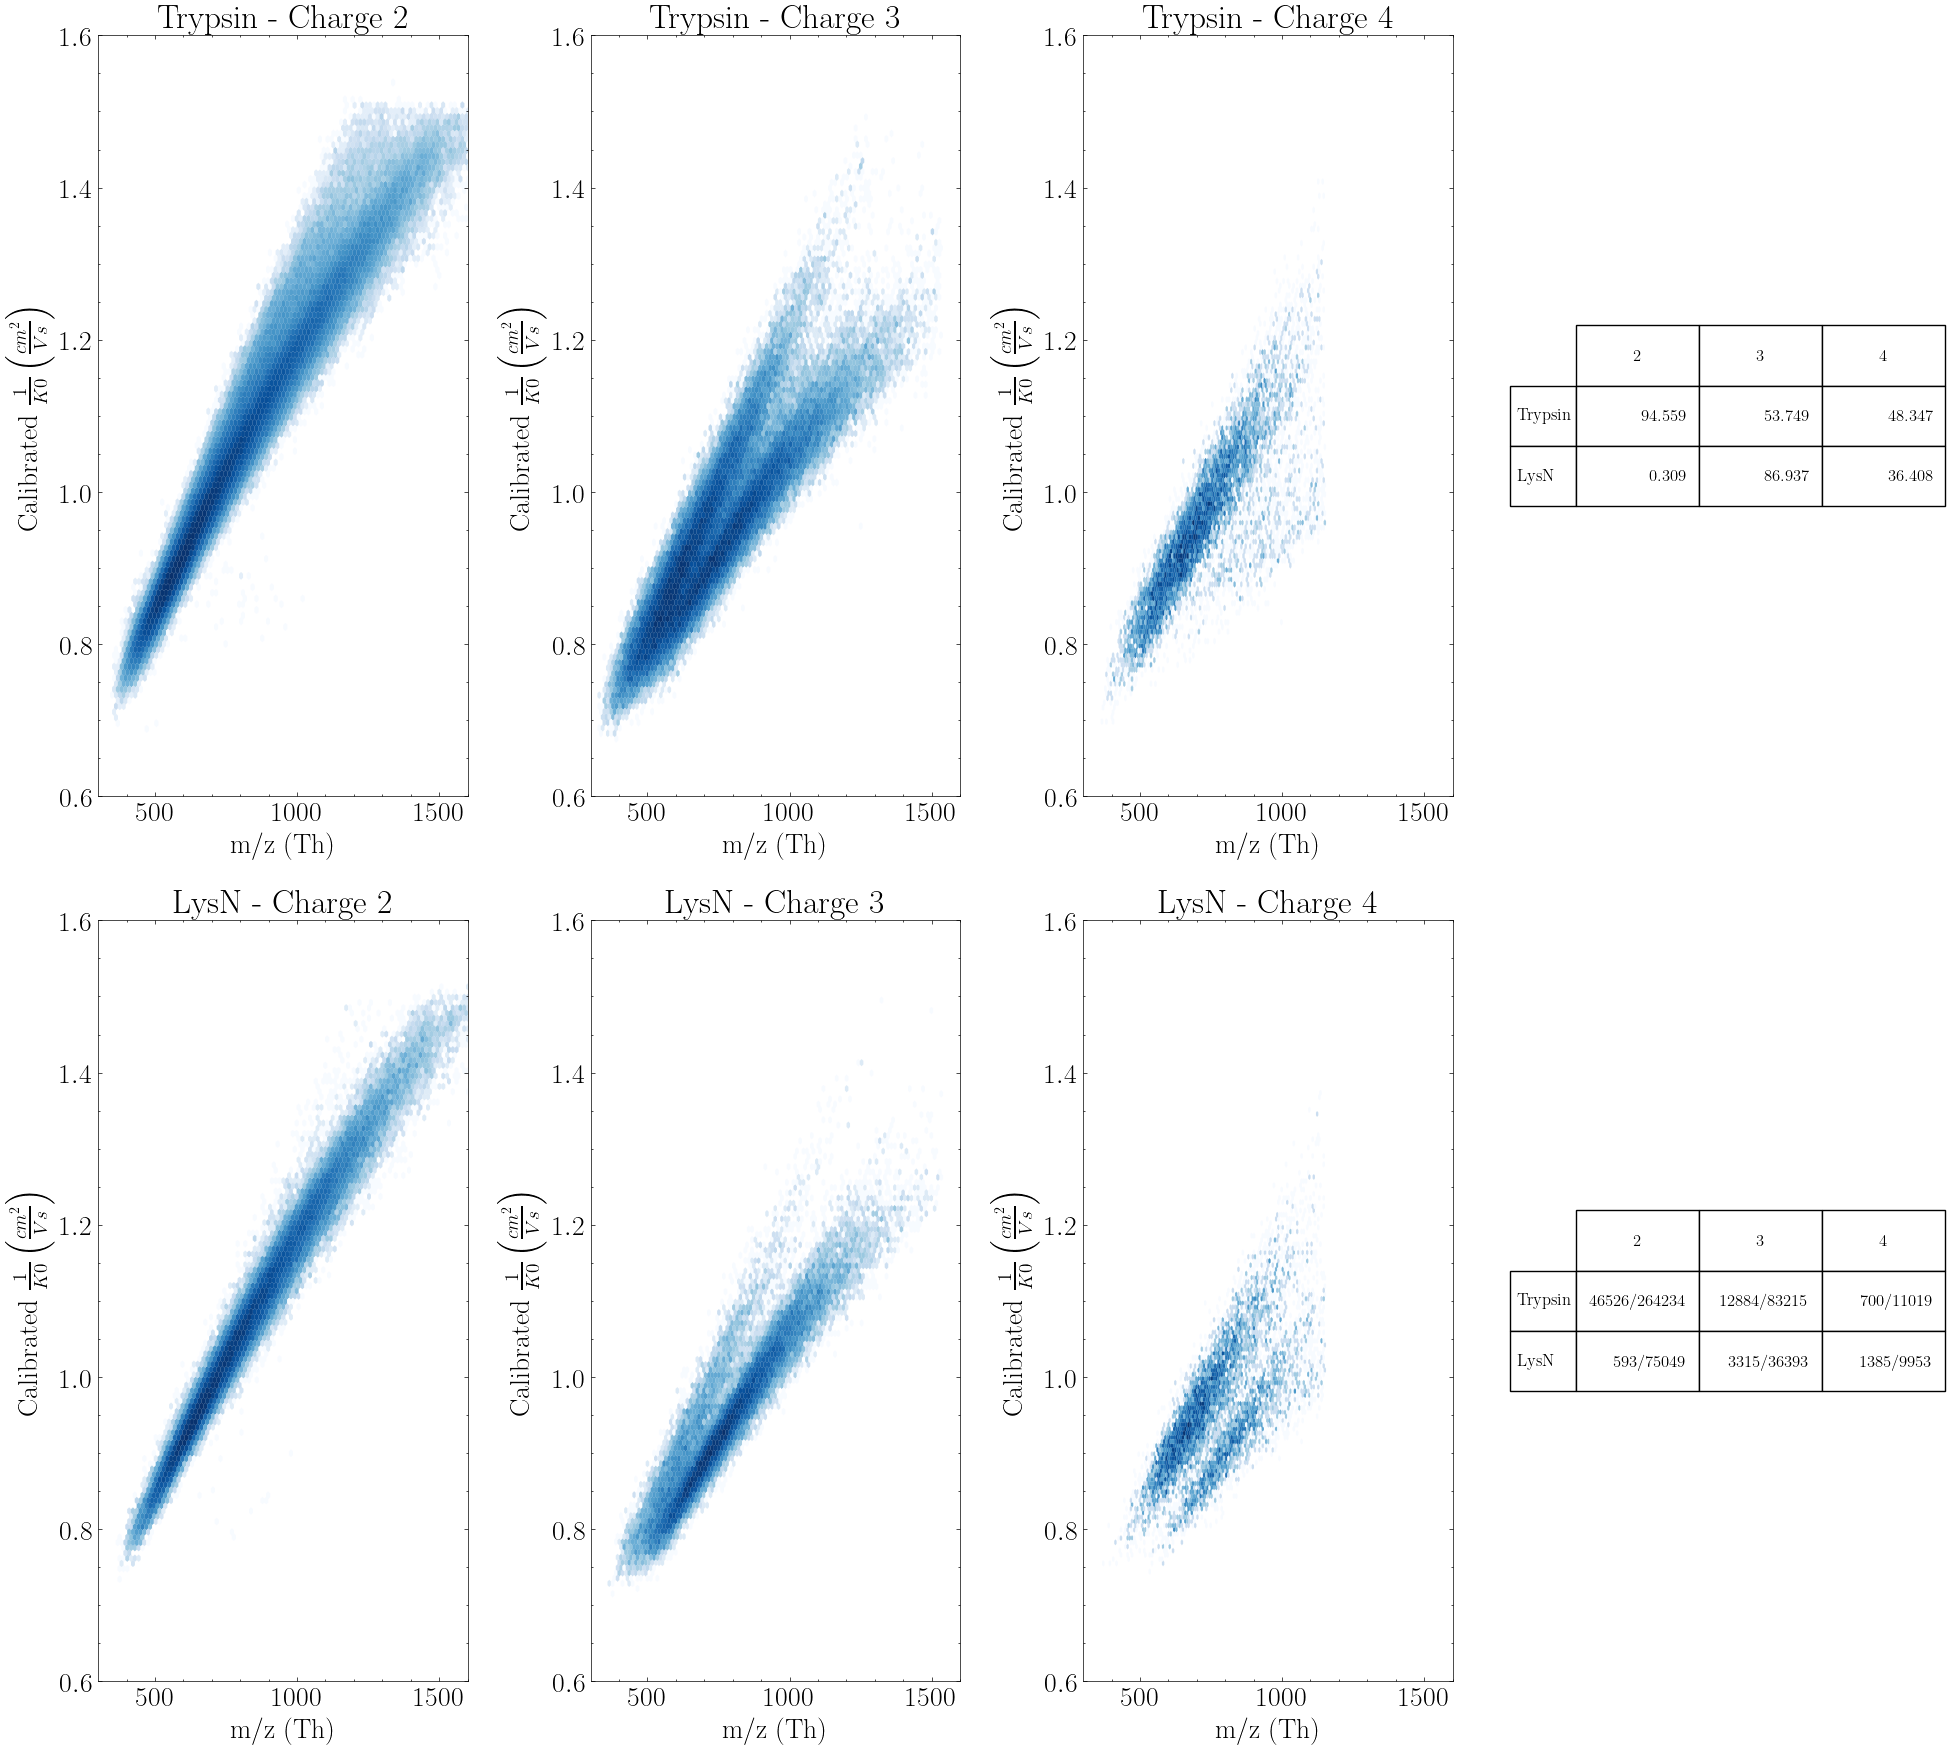

In [36]:
#plot Calibrated 1/K0 vs m/z for trypsin charge 3, lysc with charge 3, lysn with charge 4, trypsin with charge 2
fig, ax = plt.subplots(2, 4, figsize=(20, 18))
precursors = evidence.groupby(["Modified sequence", "Charge"]).first().reset_index()

for i, (enzyme, charge) in enumerate([("Trypsin", 2), ("Trypsin", 3), ("Trypsin", 4), ("LysN", 2), ("LysN", 3), ("LysN", 4)]):
    mask = precursors["Charge"] == charge
    mask &= precursors["Enzyme"] == enzyme
    precursors_charge = precursors[mask]
    #add the peptides in both clusters
    mask = peptides_both["Charge"] == charge
    mask &= peptides_both["Enzyme"] == enzyme
    peptides_in_both_charge = peptides_both[mask]
    
    ax[i//3, i%3].hexbin(precursors_charge["m/z"], precursors_charge["Aligned 1/K0"], gridsize = 100, cmap='Blues', linewidths=0.1, bins = "log", mincnt=1)
    ax[i//3, i%3].set_xlabel(r"m/z (Th)")
    ax[i//3, i%3].set_ylabel(r"Calibrated $\frac{1}{K0} \left( \frac{cm^2}{Vs} \right)$")
    ax[i//3, i%3].set_title(f"{enzyme} - Charge {charge}")
    ax[i//3, i%3].set_xlim([300, 1600])
    ax[i//3, i%3].set_ylim([0.6, 1.6])

#add the table with the volumes as percentages
ax[0,3].axis("off")
#filter out all vlaues from lysc from the table
volumes_nolysc = volumes.drop("LysC", axis=0)
table = ax[0,3].table(cellText=np.round(volumes_nolysc.values*100, 3), rowLabels=volumes_nolysc.index, colLabels=volumes_nolysc.columns, loc="center")
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.0, 3.0)

#add the table with the peptides in both clusters
ax[1,3].axis("off")
#filter out all vlaues from lysc from the table
in_both_nolysc = in_both.drop("LysC", axis=0)
table = ax[1,3].table(cellText=in_both_nolysc.values, rowLabels=in_both_nolysc.index, colLabels=in_both_nolysc.columns, loc="center")
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.0, 3.0)


plt.tight_layout()

## Supplementary Figure 4

In [49]:
diff = peptides_both.groupby(["Modified sequence","Charge"])["Aligned 1/K0"].diff().abs()
diff.argmax()

76653

In [59]:
evidence[evidence["Modified sequence"]=="_QQYESVAAK_"]

Modified sequence  Charge         m/z  Calibrated 1/K0  Aligned 1/K0  \
93773        _QQYESVAAK_       2  512.258914         0.878228      0.874237   
125777       _QQYESVAAK_       2  512.258914         0.868860      0.870663   
191732       _QQYESVAAK_       2  512.258914         0.878228      0.874632   
268048       _QQYESVAAK_       2  512.258914         0.871984      0.873175   
282648       _QQYESVAAK_       2  512.258914         0.868860      0.872542   
299100       _QQYESVAAK_       2  512.258914         0.864145      0.878665   
348939       _QQYESVAAK_       2  512.258914         0.882728      0.896214   
418212       _QQYESVAAK_       2  512.258914         0.867243      0.879301   
428186       _QQYESVAAK_       2  512.258914         0.876534      0.885026   
455465       _QQYESVAAK_       2  512.258914         0.873437      0.889138   
496738       _QQYESVAAK_       2  512.258914         0.867243      0.873079   
519211       _QQYESVAAK_       2  512.258914         0.864145      0.870131   
594373       _QQYESVAAK_       2  512.258914         0.878228      0.875329   
210533       _QQYESVAAK_       2  512.258914         0.892840      0.882124   

                                                 Raw file         Experiment  \
93773   20180631_TIMS2_12-2_AnBr_SA_200ng_HeLa_50cm_10...  Pasef_tryp_fdr001   
125777  20180631_TIMS2_12-2_AnBr_SA_200ng_HeLa_50cm_10...  Pasef_tryp_fdr001   
191732  20180631_TIMS2_12-2_AnBr_SA_200ng_HeLa_50cm_10...  Pasef_tryp_fdr001   
268048  20180631_TIMS2_12-2_AnBr_SA_200ng_HeLa_50cm_10...  Pasef_tryp_fdr001   
282648  20180631_TIMS2_12-2_AnBr_SA_200ng_HeLa_50cm_10...  Pasef_tryp_fdr001   
299100  20180631_TIMS2_12-2_AnBr_SA_200ng_HeLa_50cm_10...  Pasef_tryp_fdr001   
348939  20180631_TIMS2_12-2_AnBr_SA_200ng_HeLa_50cm_10...  Pasef_tryp_fdr001   
418212  20180631_TIMS2_12-2_AnBr_SA_200ng_HeLa_50cm_10...  Pasef_tryp_fdr001   
428186  20180631_TIMS2_12-2_AnBr_SA_200ng_HeLa_50cm_10...  Pasef_tryp_fdr001   
455465  20180631_TIMS2_12-2_AnBr_SA_200ng_HeLa_50cm_10...  Pasef_tryp_fdr001   
496738  20180631_TIMS2_12-2_AnBr_SA_200ng_HeLa_50cm_10...  Pasef_tryp_fdr001   
519211  20180631_TIMS2_12-2_AnBr_SA_200ng_HeLa_50cm_10...  Pasef_tryp_fdr001   
594373  20180631_TIMS2_12-2_AnBr_SA_200ng_HeLa_50cm_10...  Pasef_tryp_fdr001   
210533        20190504_TIMS1_FlMe_SA_HeLa_frac05_E10_1_97    HeLa_trp_fdr001   

                                   Calibrated 1/K0 values  \
93773   0.89070976;0.8875903;0.8844702;0.8813495;0.878...   
125777  0.8813495;0.8782282;0.87510616;0.8719835;0.868...   
191732  0.8875903;0.8844702;0.8813495;0.8782282;0.8751...   
268048  0.8813495;0.8782282;0.87510616;0.8719835;0.868...   
282648  0.8813495;0.8782282;0.87510616;0.8719835;0.868...   
299100  0.88582426;0.88272774;0.8796311;0.8765343;0.87...   
348939  0.8982086;0.8951128;0.89201677;0.8889206;0.885...   
418212  0.8796311;0.8765343;0.8734373;0.8703401;0.8672...   
428186  0.8889206;0.88582426;0.88272774;0.8796311;0.87...   
455465  0.8951128;0.89201677;0.8889206;0.88582426;0.88...   
496738  0.8796311;0.8765343;0.8734373;0.8703401;0.8672...   
519211  0.8796311;0.8765343;0.8734373;0.8703401;0.8672...   
594373  0.9031811;0.90006423;0.8969467;0.8938286;0.890...   
210533  0.91739285;0.91432464;0.9112562;0.9081875;0.90...   

                                         Intensity values  Reverse  Intensity  
93773   67.91402;106.63944;188.29369;152.49478;440.333...      NaN    52382.0  
125777  141.20764;664.63855;1679.2885;2521.6638;2847.9...      NaN    11541.0  
191732  44.180683;240.66592;853.3012;2319.541;3819.548...      NaN    17103.0  
268048  37.72651;88.41021;175.92368;530.8782;1832.2278...      NaN    25387.0  
282648  180.4872;884.82947;1666.5247;2326.6196;1905.16...      NaN     8728.6  
299100  52.754436;417.1386;1664.9838;3398.3474;4760.17...      NaN    23735.0  
348939  37.085632;177.37344;396.12143;538.75806;726.12...      NaN   515500.0  
418212  39.315872;49.95971;61.91063;47.40732;50.067226...      N

Text(0, 0.5, 'Intensity (counts)')

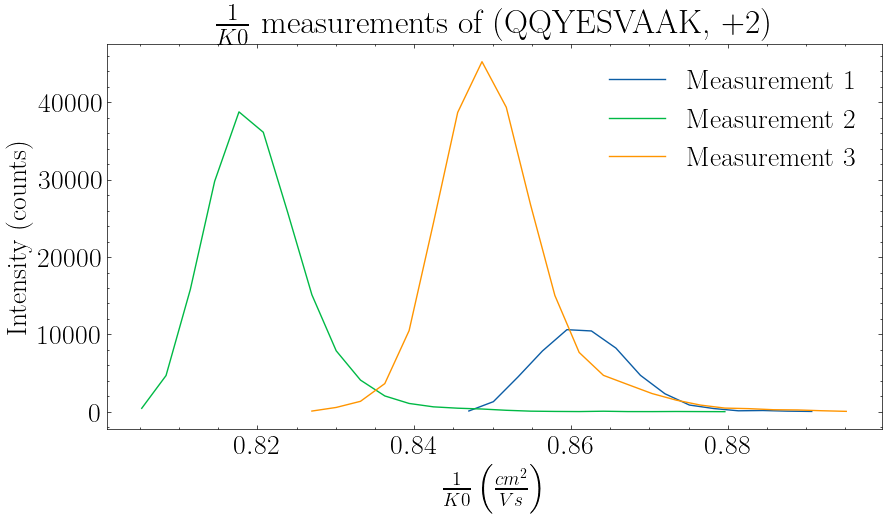

In [65]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
K0inv_1 = np.array(evidence[evidence["Modified sequence"]=="_QQYESVAAK_"]['Calibrated 1/K0 values'][93773].split(";"), dtype=np.float64)
K0inv_2 = np.array(evidence[evidence["Modified sequence"]=="_QQYESVAAK_"]['Calibrated 1/K0 values'][418212].split(";"), dtype=np.float64)
K0inv_3 = np.array(evidence[evidence["Modified sequence"]=="_QQYESVAAK_"]['Calibrated 1/K0 values'][455465].split(";"), dtype=np.float64)
intensities_1 = np.array(evidence[evidence["Modified sequence"]=="_QQYESVAAK_"]['Intensity values'][93773].split(";"), dtype=np.float64)
intensities_2 = np.array(evidence[evidence["Modified sequence"]=="_QQYESVAAK_"]['Intensity values'][418212].split(";"), dtype=np.float64)
intensities_3 = np.array(evidence[evidence["Modified sequence"]=="_QQYESVAAK_"]['Intensity values'][455465].split(";"), dtype=np.float64)


ax.plot(K0inv_1, intensities_1, label="Measurement 1")
ax.plot(K0inv_2, intensities_2, label="Measurement 2")
ax.plot(K0inv_3, intensities_3, label="Measurement 3")
ax.legend()
ax.set_title(r"$\frac{1}{K0}$ measurements of (QQYESVAAK, +2)")
ax.set_xlabel(r"$\frac{1}{K0} \left( \frac{cm^2}{Vs} \right)$")
ax.set_ylabel(r"Intensity (counts)")